In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC as svc
#data analysis
data=pd.read_csv("D:\CS Investigatory Project - Heart Attack Risk Prediction\heart.csv")
data.head(6) 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [2]:
data.shape

(303, 14)

In [3]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

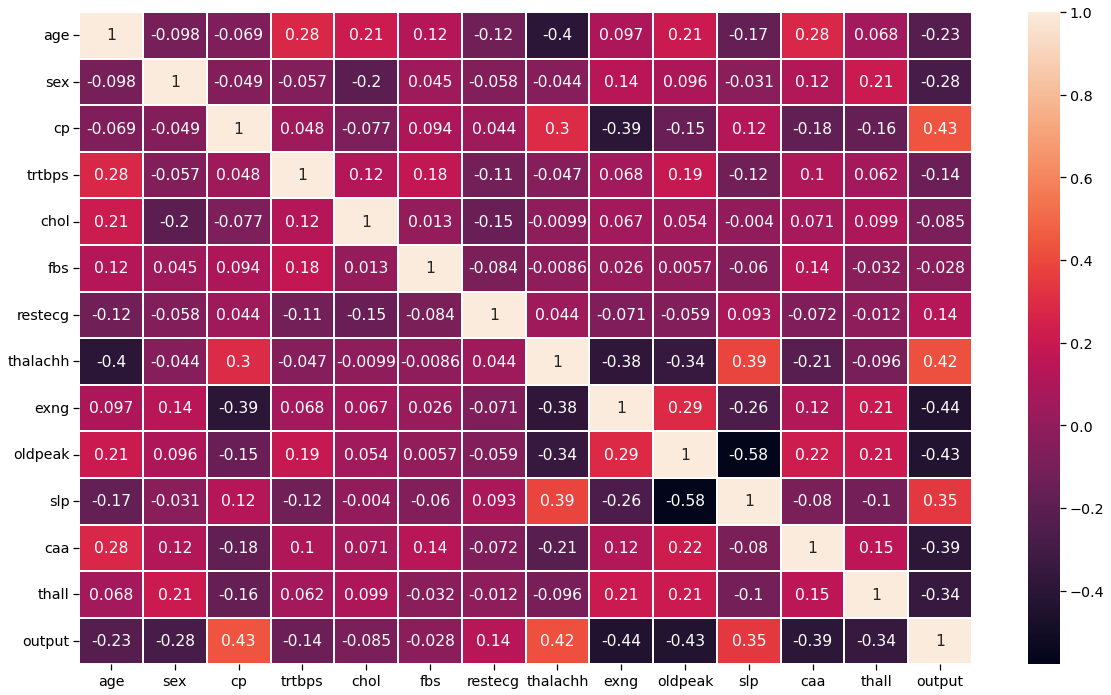

In [4]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(),annot=True,linewidth =2)

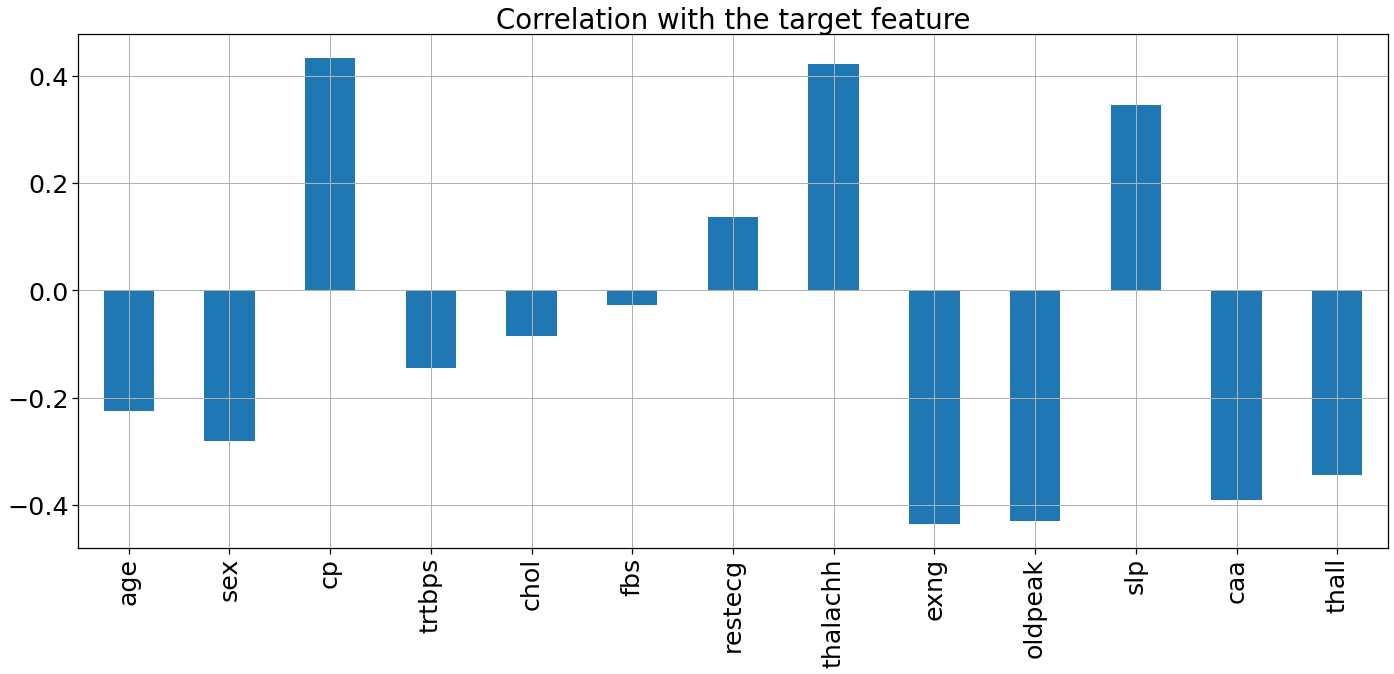

In [5]:
plt.tight_layout()
sns.set_context('notebook',font_scale = 2.3)
data.drop('output', axis=1).corrwith(data.output).plot(kind='bar', grid=True, figsize=(20, 10), title="Correlation with the target feature")
plt.tight_layout()

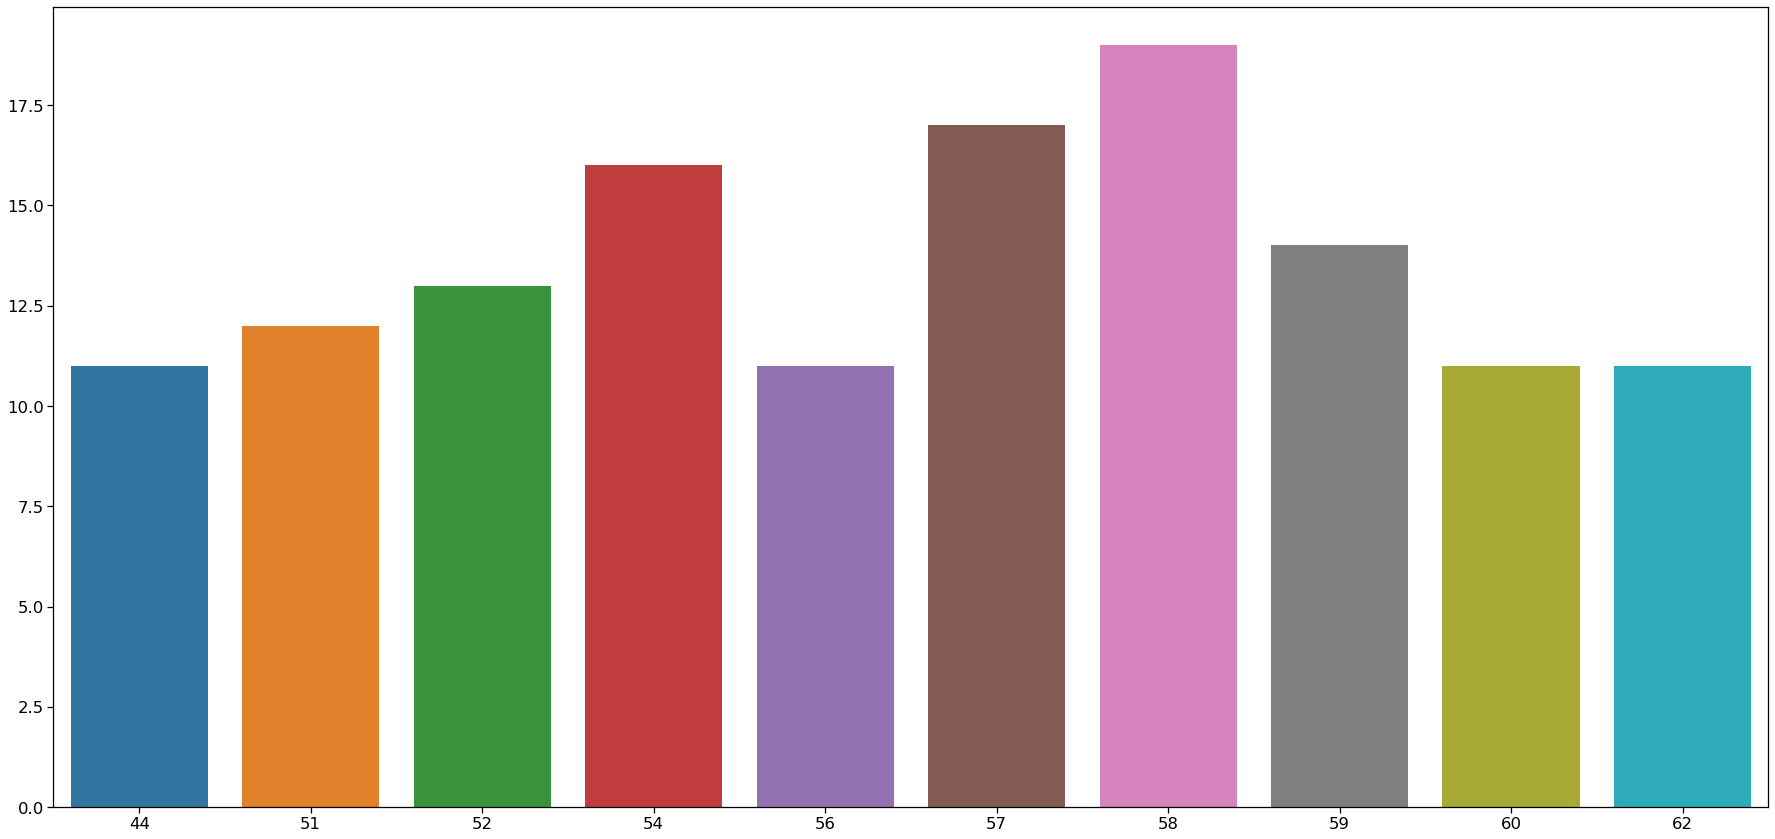

In [6]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data.age.value_counts()[:10].index,y=data.age.value_counts()[:10].values)
plt.tight_layout()

In [7]:
minAge=min(data.age)
maxAge=max(data.age)
meanAge=data.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


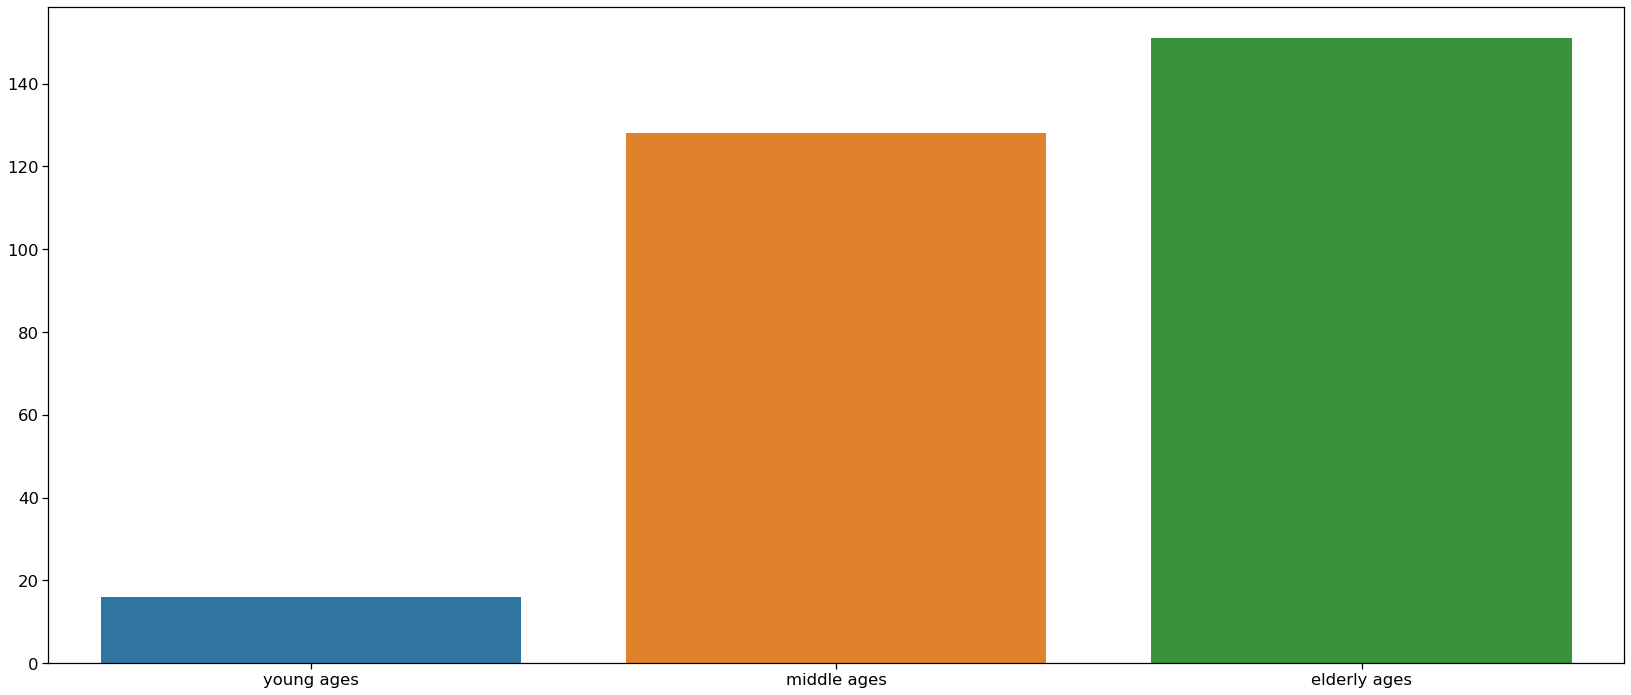

In [8]:
Young = data[(data.age>=29)&(data.age<40)]
Middle = data[(data.age>=40)&(data.age<55)]
Elder = data[(data.age>55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

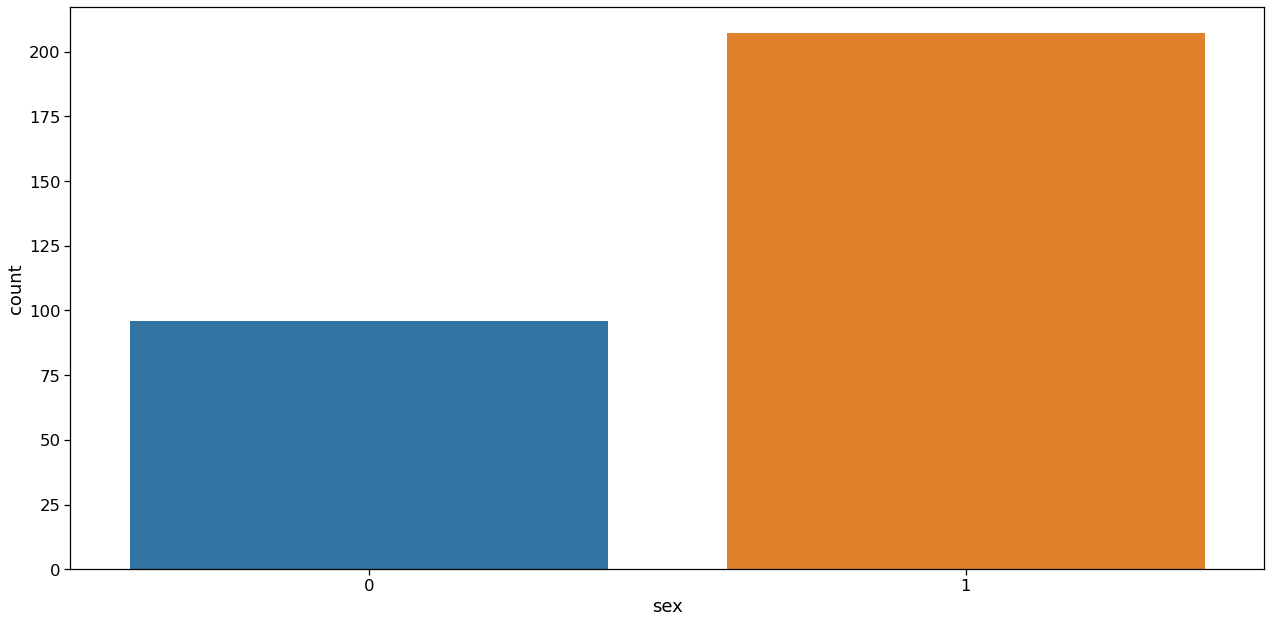

In [9]:
sex=data['sex']
male=data[(data.sex<1)]
female=data[(data.sex>=1)]
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(x=data['sex'])
plt.tight_layout()

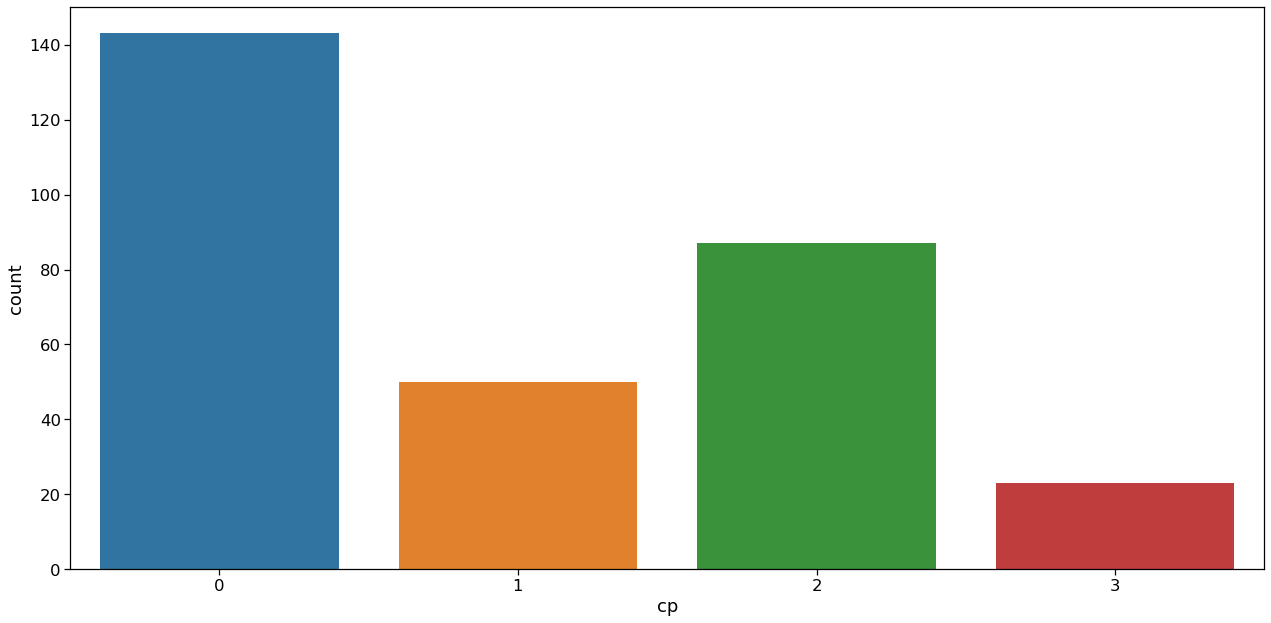

In [10]:
cp=data['cp']
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(x=data['cp'])
plt.tight_layout()

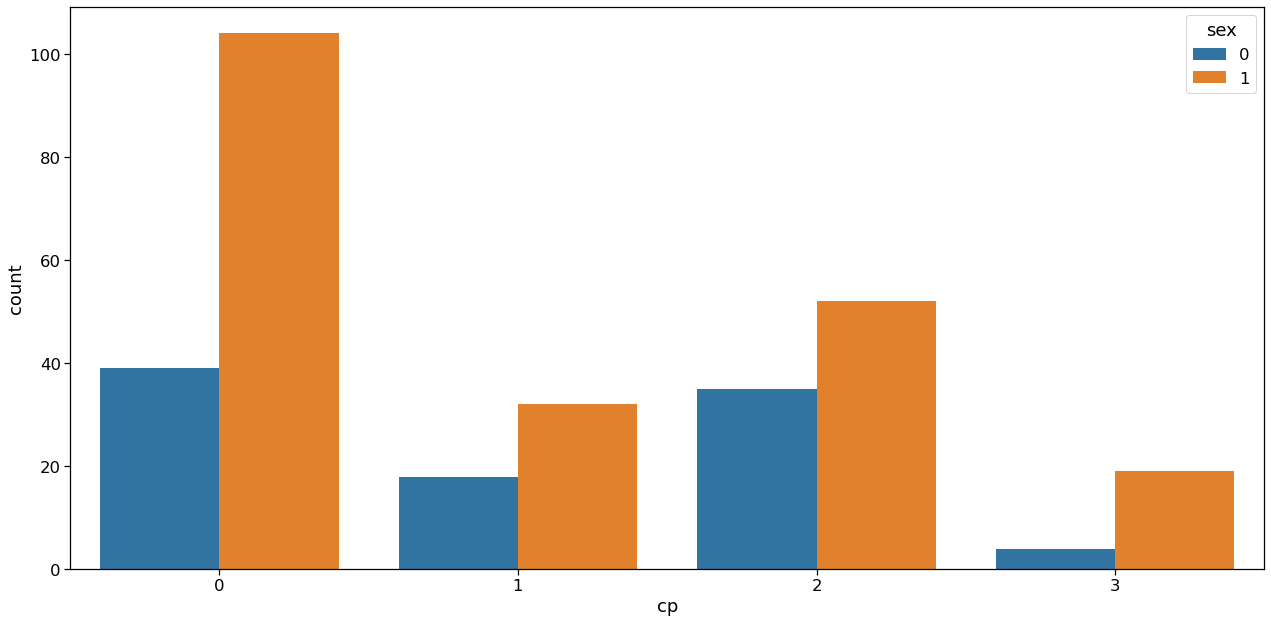

In [11]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(x=data['cp'],hue=data['sex'])
plt.tight_layout()

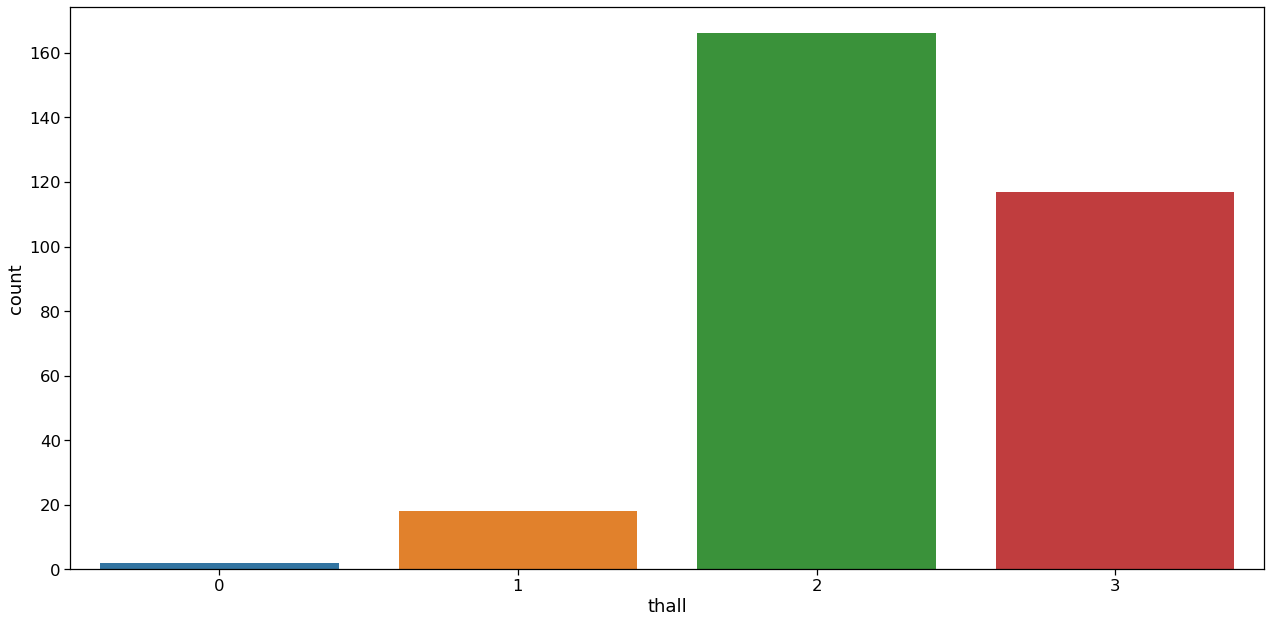

In [12]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(x=data['thall'])
plt.tight_layout()

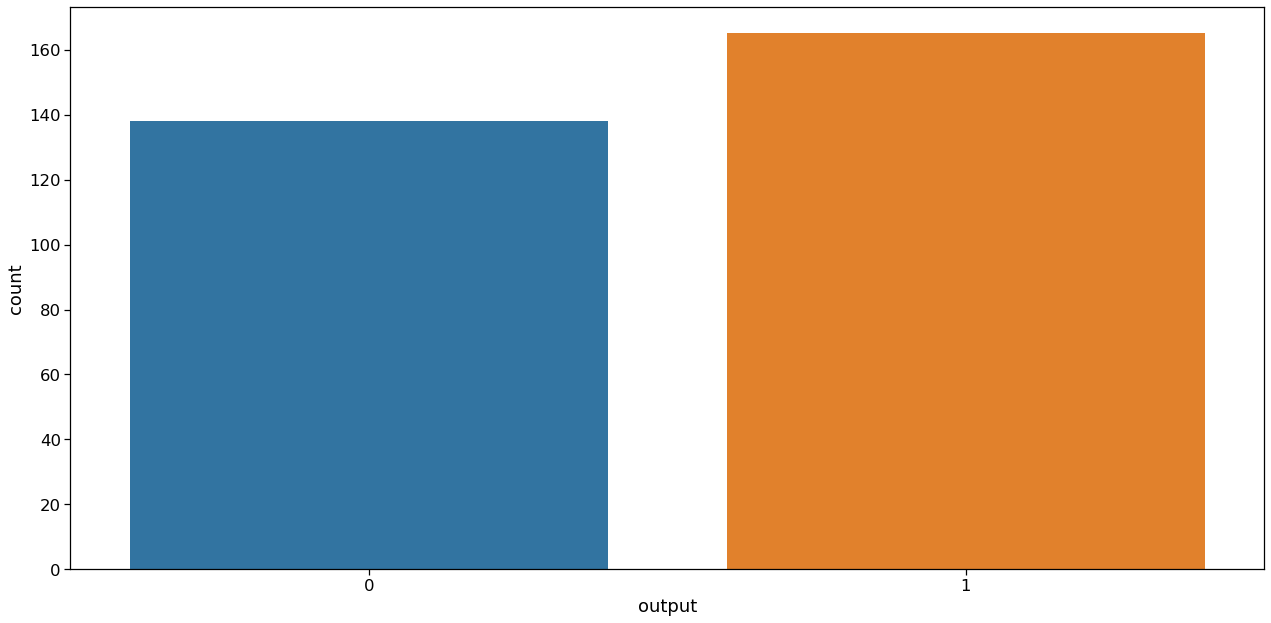

In [13]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(x=data['output'])
plt.tight_layout()

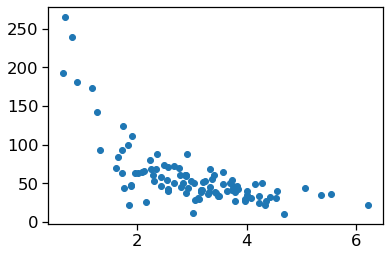

In [14]:
X = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / X

plt.scatter(X, y)
plt.show()

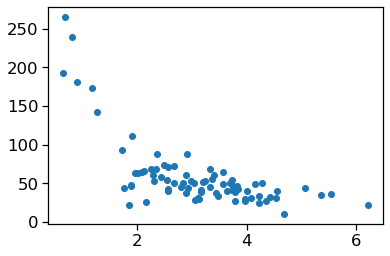

In [15]:
X_train = X[:80]
y_train = y[:80]

X_test = X[80:]
y_test = y[80:]

plt.scatter(X_train, y_train)
plt.show()

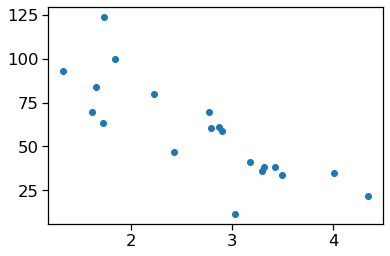

In [16]:
plt.scatter(X_test, y_test)
plt.show()

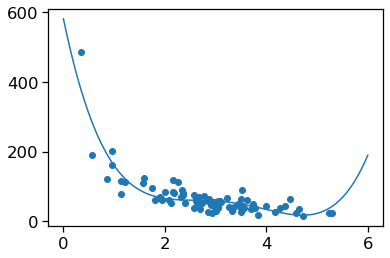

In [17]:
np.random.seed(2)

X = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / X

X_train = X[:80]
y_train = y[:80]

X_test = X[80:]
y_test = y[80:]

mymodel = np.poly1d(np.polyfit(X_train, y_train, 4))

myline = np.linspace(0, 6, 100)

plt.scatter(X_train, y_train)
plt.plot(myline, mymodel(myline))
plt.show()

In [18]:
categorical_val = []
continous_val = []
for column in data.columns:
    print("--------------------")
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

--------------------
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
--------------------
sex : [1 0]
--------------------
cp : [3 2 1 0]
--------------------
trtbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
--------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 

In [19]:
X = data.drop(['output'],axis=1)
y = data['output']

In [30]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [31]:
sc = StandardScaler()
col_to_scale = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
data[col_to_scale] = sc.fit_transform(data[col_to_scale])
data.head(6)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1
5,0.290464,1,0,0.478391,-1.048678,0,1,-0.072018,0,-0.551783,1,0,1,1


In [32]:
X = data.drop(['output'],axis=1)
y = data['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)
print(accuracy_score(y_test,y_pred1))

0.8021978021978022


In [34]:
knn_scores=[]
for k in range(1,40):
    knn_classifier=KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train,y_train)
    knn_scores.append(knn_classifier.score(X_test,y_test))
print(f'Best choice of k: {np.argmax(knn_scores)+1}')

Best choice of k: 3


In [35]:
k=3
knn_classifier=KNeighborsClassifier(n_neighbors = k)
knn_classifier.fit(X_train,y_train)
y_pred = knn_classifier.predict(X_test)
print(f'Accuracy: {np.sum(y_pred==y_test)/len(y_test)}')

Accuracy: 0.8461538461538461


In [28]:
data.head(1)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1


In [29]:
a=[[63,3,145,233,150,2.3,0]]
svc.predict(a)

TypeError: predict() missing 1 required positional argument: 'X'